In [2]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


### Importing the Data

In [3]:
#read the data
austin_df = pd.read_csv('Data/reviews_austin.csv')
chicago_df = pd.read_csv('Data/reviews_chicago.csv')
columbus_df = pd.read_csv('Data/reviews_columbus.csv')
dallas_df = pd.read_csv('Data/reviews_dallas.csv')
denver_df = pd.read_csv('Data/reviews_denver.csv')
la_df = pd.read_csv('Data/reviews_la.csv')
ny_df = pd.read_csv('Data/reviews_ny.csv')
sandiego_df = pd.read_csv('Data/reviews_sandiego.csv')
sanfran_df = pd.read_csv('Data/reviews_sanfrancisco.csv')
seattle_df = pd.read_csv('Data/reviews_seattle.csv')

In [4]:
#make one big dataframe
all_reviews = pd.concat([austin_df, chicago_df, columbus_df, dallas_df, denver_df, la_df, ny_df, sandiego_df, sanfran_df, seattle_df])

In [5]:
#drop columns that are not needed
all_reviews = all_reviews.drop(columns=['id', 'date', 'reviewer_id', 'reviewer_name'])

In [6]:
#drop listing id
all_reviews = all_reviews.drop(columns=['listing_id'])

In [7]:
all_reviews

,comments
0,Sylvia is a hostess who is gracious and helpfu...
1,Highly recommended. Sylvia was extremely helpf...
2,A great place to stay in a great city. Sylvia ...
3,Highly recommended! \r<br/>Cute and cozy guest...
4,"What a great little apartment! It was clean, ..."
...,...
481345,"Great location, walkable to lots of local spots."
481346,Amazing experience with the host and the place...
481347,This place was a stunner! Seung was really hel...
481348,The place was extremely well kept and clean. B...


In [8]:
all_reviews.isnull().sum()

comments    1428
dtype: int64

In [9]:
#drop the rows with missing values
all_reviews = all_reviews.dropna()

In [23]:
all_reviews.isnull().sum()

comments    0
dtype: int64

In [10]:
all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5896901 entries, 0 to 481349
Data columns (total 1 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   comments  object
dtypes: object(1)
memory usage: 90.0+ MB


### Creating a Sample

In [11]:
#make a sample of the data
all_reviews_sample = all_reviews.sample(frac=0.1)

In [12]:
all_reviews_sample

,comments
152187,My four friends and I stayed here and it was a...
263180,Nick hosted me and my sister for 3 nights in L...
472815,Maritza’s home is very comfortable and clean- ...
793787,The description is spot on. Very cozy place f...
42531,"Anne's place is in the beautiful area, Travis ..."
...,...
247820,Ronny was a fantastic host and the house was g...
345095,"Last minute NYC travel, felt so good to be bac..."
148983,La estancia en la casa de Marc ha sido como es...
36343,Leo was a perfect host... the place was as adv...


In [13]:
reviews = all_reviews_sample['comments']  

### Tokanize and Extract Keywords

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

# Convert to lowercase
reviews = reviews.str.lower()

# Tokenize the reviews
reviews = reviews.apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
reviews = reviews.apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasmaoficierecakste/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasmaoficierecakste/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Flatten the list of words
all_words = [word for review in reviews for word in review]

# Use Counter to count word frequencies
word_freq = Counter(all_words)

# Convert to a DataFrame for easier analysis
freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)


In [19]:
freq_df.to_csv('Data/word_freq.csv', index=False)

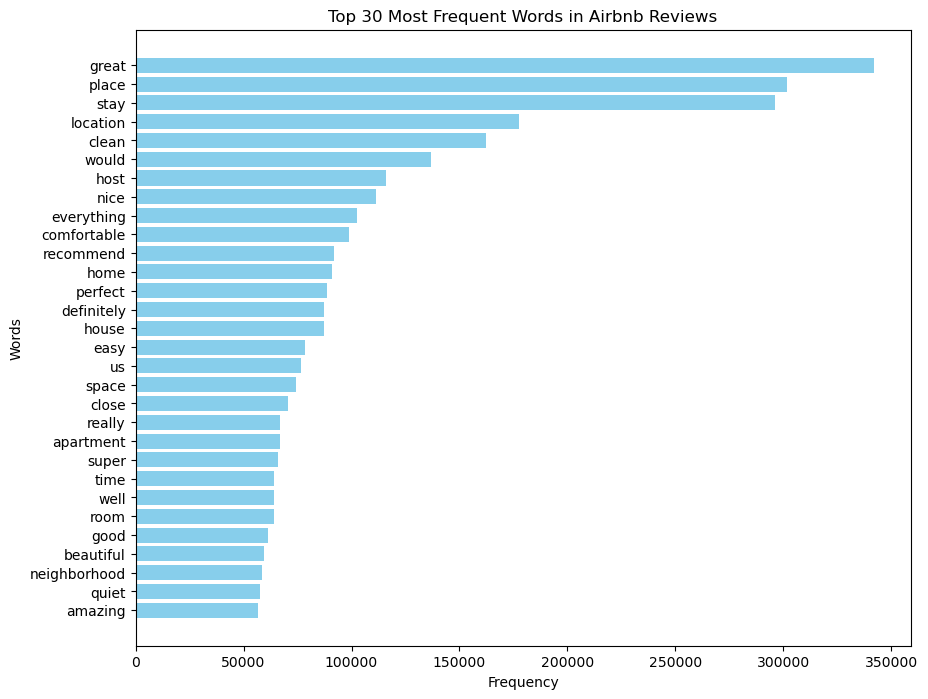

In [17]:
# Plot the top 30 most frequent words
top_n = 30
top_words = freq_df.head(top_n)

plt.figure(figsize=(10, 8))
plt.barh(top_words['word'], top_words['frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Top {top_n} Most Frequent Words in Airbnb Reviews')
plt.gca().invert_yaxis()  # Highest frequency at the top
plt.show()
